In [1]:
%load_ext autoreload
%autoreload 2a

import importlib
import io
import os
import sys
import csv
import gzip
import time
import secrets
import multiprocessing
import subprocess
import resource
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statsmodels.api as sm
import random
from collections import Counter
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
import itertools
import collections
sys.path.append('/well/band/users/rbx225/software/lcwgsus/')
import lcwgsus

from scipy.stats import poisson
from scipy.stats import chi2
from scipy.stats import friedmanchisquare
from scipy.stats import studentized_range
pd.options.mode.chained_assignment = None
%cd /gpfs3/well/band/users/rbx225/GAMCC/

# from matplotlib import colormaps
# list(colormaps)

importlib.reload(lcwgsus)

/gpfs3/well/band/users/rbx225/GAMCC


<module 'lcwgsus' from '/well/band/users/rbx225/software/lcwgsus/lcwgsus/__init__.py'>

# Currently working on: IMPUTATION 

In [22]:
cols = ['Comparison', 'Subset', 'Threshold', 'NRC', 'r2', 'ccd_homref', 'ccd_het', 'ccd_homalt']
chromosomes = [str(i) for i in range(1,23)]
sumstats = pd.DataFrame(columns=cols)
case_controls = ['non-malaria_control', 'mild_malaria', 'severe_malaria']
ethnicities = ['fula', 'jola', 'mandinka', 'wollof']

v_lst = ["results/imputation_comparison/oneKG/lc_chip_typed/impacc/all_samples/by_sample/chr" + i + ".v.impacc.tsv" for i in chromosomes]
v_dfs = [pd.read_csv(i, sep = '\t') for i in v_lst]
v = lcwgsus.average_impacc_by_chr(v_dfs)
for t in [0.01,0.05]:
    res = ['lc_chip_typed', 'all'] + [t] + list(lcwgsus.calculate_imputation_summary_metrics(v, t))
    sumstats.loc[len(sumstats)] = res
    
for c in case_controls:
    v_lst = ["results/imputation_comparison/oneKG/lc_chip_typed/impacc/by_cc/by_sample/" + c + ".chr" + i + ".v.impacc.tsv" for i in chromosomes]
    v_dfs = [pd.read_csv(i, sep = '\t') for i in v_lst]
    v = lcwgsus.average_impacc_by_chr(v_dfs)
    for t in [0.01,0.05]:
        res = ['lc_chip_typed', c] + [t] + list(lcwgsus.calculate_imputation_summary_metrics(v, t))
        sumstats.loc[len(sumstats)] = res
        
for e in ethnicities:
    v_lst = ["results/imputation_comparison/oneKG/lc_chip_typed/impacc/by_eth/by_sample/" + e + ".chr" + i + ".v.impacc.tsv" for i in chromosomes]
    v_dfs = [pd.read_csv(i, sep = '\t') for i in v_lst]
    v = lcwgsus.average_impacc_by_chr(v_dfs)
    for t in [0.01,0.05]:
        res = ['lc_chip_typed', e] + [t] + list(lcwgsus.calculate_imputation_summary_metrics(v, t))
        sumstats.loc[len(sumstats)] = res

In [28]:
v_lst = ["results/imputation_comparison/oneKG/lc_chip_typed_high_info/impacc/all_samples/by_sample/chr" + i + ".v.impacc.tsv" for i in chromosomes]
v_dfs = [pd.read_csv(i, sep = '\t') for i in v_lst]
v = lcwgsus.average_impacc_by_chr(v_dfs)
for t in [0.01,0.05]:
    res = ['lc_chip_typed_high_info', 'all'] + [t] + list(lcwgsus.calculate_imputation_summary_metrics(v, t))
    sumstats.loc[len(sumstats)] = res
    
for c in case_controls:
    v_lst = ["results/imputation_comparison/oneKG/lc_chip_typed_high_info/impacc/by_cc/by_sample/" + c + ".chr" + i + ".v.impacc.tsv" for i in chromosomes]
    v_dfs = [pd.read_csv(i, sep = '\t') for i in v_lst]
    v = lcwgsus.average_impacc_by_chr(v_dfs)
    for t in [0.01,0.05]:
        res = ['lc_chip_typed_high_info', c] + [t] + list(lcwgsus.calculate_imputation_summary_metrics(v, t))
        sumstats.loc[len(sumstats)] = res
        
for e in ethnicities:
    v_lst = ["results/imputation_comparison/oneKG/lc_chip_typed_high_info/impacc/by_eth/by_sample/" + e + ".chr" + i + ".v.impacc.tsv" for i in chromosomes]
    v_dfs = [pd.read_csv(i, sep = '\t') for i in v_lst]
    v = lcwgsus.average_impacc_by_chr(v_dfs)
    for t in [0.01,0.05]:
        res = ['lc_chip_typed_high_info', e] + [t] + list(lcwgsus.calculate_imputation_summary_metrics(v, t))
        sumstats.loc[len(sumstats)] = res

In [30]:
sumstats.to_csv("results/imputation_comparison/oneKG/summary_metrics.tsv", index = False, header = True, sep = '\t')

In [31]:
sumstats

,Comparison,Subset,Threshold,NRC,r2,ccd_homref,ccd_het,ccd_homalt
0,lc_chip_typed,all,0.01,0.985,0.970,0.997,0.983,0.987
1,lc_chip_typed,all,0.05,0.985,0.974,0.995,0.984,0.987
2,lc_chip_typed,non-malaria_control,0.01,0.985,0.972,0.997,0.984,0.988
3,lc_chip_typed,non-malaria_control,0.05,0.986,0.975,0.995,0.984,0.988
4,lc_chip_typed,mild_malaria,0.01,0.985,0.970,0.997,0.983,0.987
5,lc_chip_typed,mild_malaria,0.05,0.985,0.974,0.995,0.983,0.987
6,lc_chip_typed,severe_malaria,0.01,0.984,0.969,0.997,0.983,0.986
7,lc_chip_typed,severe_malaria,0.05,0.985,0.973,0.994,0.983,0.987
8,lc_chip_typed,fula,0.01,0.985,0.971,0.997,0.984,0.987
9,lc_chip_typed,fula,0.05,0.985,0.975,0.995,0.984,0.988


In [56]:
chromosomes = [str(i) for i in range(1,23)]
h_lst = ["results/imputation_metrics/lc_chip/by_variant/lc.chip.typed.chr" + i + ".h.impacc.tsv" for i in chromosomes]
v_lst = ["results/imputation_metrics/lc_chip/by_sample/lc.chip.typed.chr" + i + ".v.impacc.tsv" for i in chromosomes]

h_dfs = [pd.read_csv(i, sep = '\t') for i in h_lst]
v_dfs = [pd.read_csv(i, sep = '\t') for i in v_lst]

h = lcwgsus.average_impacc_by_chr(h_dfs)
v = lcwgsus.average_impacc_by_chr(v_dfs)

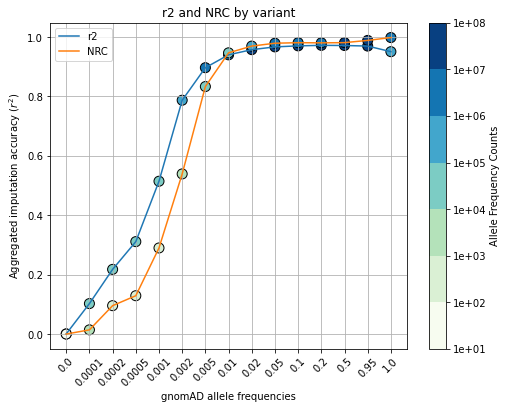

In [191]:
dfs = [h[['AF', 'r2', 'r2_AC']], h[['AF', 'NRC', 'NRC_AC']]]
lcwgsus.plot_imputation_accuracy(dfs, title = 'r2 and NRC by variant')

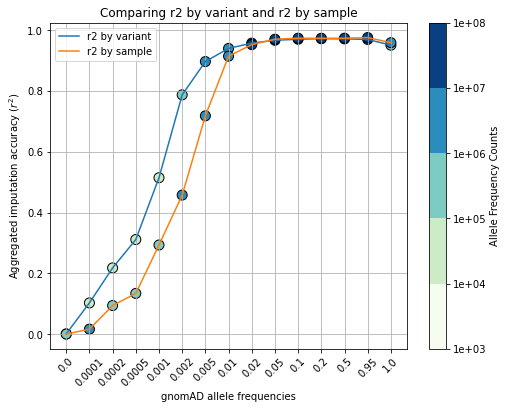

In [194]:
dfs = [h[['AF', 'r2', 'r2_AC']], v[['AF', 'r2', 'r2_AC']]]
plot_imputation_accuracy(dfs, labels = ['r2 by variant', 'r2 by sample'], title = 'Comparing r2 by variant and r2 by sample')

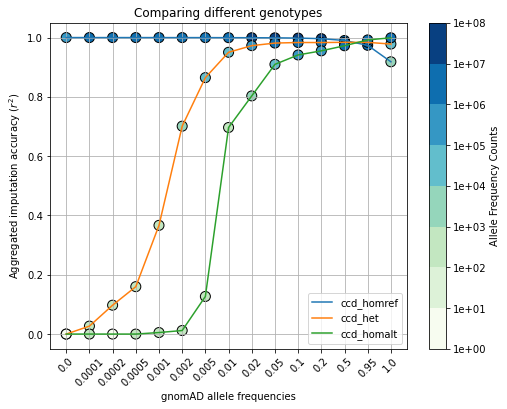

In [196]:
dfs = [h[['AF', 'ccd_homref', 'ccd_homref_AC']], h[['AF', 'ccd_het', 'ccd_het_AC']], h[['AF', 'ccd_homalt', 'ccd_homalt_AC']]]
plot_imputation_accuracy(dfs, title = 'Comparing different genotypes')

---
# For Gavin plot

In [18]:
chip_oneKG_chr11 = "/well/band/users/rbx225/GAMCC/results/chip/imputed/oneKG/vcf/chr11.all.vcf.gz"
chip_topmed_chr11 = "/well/band/users/rbx225/GAMCC/results/chip/imputed/topmed/vcf/chr11.all.vcf.gz"
chip_type_chr11 = "/well/band/users/rbx225/GAMCC/results/chip/imputed/oneKG/vcf/chr11.typed.vcf.gz"
quilt_oneKG_chr11 = "/well/band/users/rbx225/GAMCC/results/imputation/vcfs/oneKG/quilt.chr11.vcf.gz"
vcfs = [chip_oneKG_chr11, chip_topmed_chr11, quilt_oåneKG_chr11, chip_type_chr11]
for i in vcfs:
    command = 'tabix ' + i
    subprocess.run(command, shell = True)

# if result.returncode == 0:
#     # Parse the output and create a Pandas DataFrame
#     columns = ['CHROM', 'POS', 'REF', 'ALT', 'QUAL']
#     data = [line.strip().split('\t') for line in result.stdout.split('\n') if line.strip()]
#     df = pd.DataFrame(data, columns=columns)
#     print(df)

[tabix] the index file exists. Please use '-f' to overwrite.


In [52]:
site = "chr11:5227002-5227002"
df_ary = []
common_cols = ['chr', 'pos', 'id', 'ref', 'alt', 'qual', 'filter', 'info', 'format']
for i in vcfs:
    command = "tabix" + " " + i + " " + site + " | tail -n 1"
    data = subprocess.run(command, shell = True, capture_output = True, text = True).stdout[:-1].split('\t')
    command = "bcftools query -l" + " " + i
    name = subprocess.run(command, shell = True, capture_output = True, text = True).stdout[:-1].split('\n')
    col = common_cols + name
    df = pd.DataFrame([data], columns=col)
    df_ary.append(df)

In [54]:
df_ary[0]

,chr,pos,id,ref,alt,qual,filter,info,format,GAM013489,...,GAM897412,GAM905721,GAM907384,GAM916387,GAM918732,GAM942670,GAM946580,GAM951206,GAM967203,GAM975418
0,chr11,5227002,chr11:5227002:T:A,T,A,.,PASS,AF=0.05665;MAF=0.05665;R2=0.99625;ER2=0.92650;...,GT:DS:HDS:GP,"0|0:0:0,0:1,0,0",...,"0|0:0:0,0:1,0,0","1|0:1.000:1.000,0.000:0.000,1.000,0.000","0|0:0:0,0:1,0,0","0|0:0:0,0:1,0,0","0|0:0:0,0:1,0,0","0|0:0:0,0:1,0,0","0|0:0.005:0.000,0.005:0.995,0.005,0.000","0|0:0:0,0:1,0,0","0|0:0:0,0:1,0,0","0|0:0:0,0:1,0,0"


In [55]:
df_ary[1]

,chr,pos,id,ref,alt,qual,filter,info,format,GAM013489,...,GAM897412,GAM905721,GAM907384,GAM916387,GAM918732,GAM942670,GAM946580,GAM951206,GAM967203,GAM975418
0,chr11,5227002,rs334,T,A,.,.,AF=0.0565;MAF=0.0565;AVG_CS=0.999952;R2=0.9991...,GT:GP:DS:HDS,"0|0:1,0,0:0:0,0",...,"0|0:1,0,0:0:0,0","1|0:0,1,0:1:1,0","0|0:1,0,0:0:0,0","0|0:1,0,0:0:0,0","0|0:1,0,0:0:0,0","0|0:1,0,0:0:0,0","0|0:1,0,0:0:0,0","0|0:1,0,0:0:0,0","0|0:1,0,0:0:0,0","0|0:1,0,0:0:0,0"


In [56]:
df_ary[2]

,chr,pos,id,ref,alt,qual,filter,info,format,GM8,...,GM804,GM805,GM856,GM861,GM866,GM872,GM1110,GM1114,GM1117,GM1175
0,chr11,5227002,.,T,A,.,PASS,EAF=0.07854;INFO_SCORE=0.84433;HWE=0.000213;ER...,GT:GP:DS,"0|1:0.001,0.893,0.106:1.104",...,"0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.996,0.004,0:0.004","0|0:0.998,0.002,0:0.002","1|1:0,0.002,0.998:1.998","0|0:0.998,0.002,0:0.002","0|0:0.817,0.183,0:0.183","0|0:0.997,0.003,0:0.003"


In [57]:
df_ary[3]

,chr,pos,id,ref,alt,qual,filter,info,format,GAM013489,...,GAM897412,GAM905721,GAM907384,GAM916387,GAM918732,GAM942670,GAM946580,GAM951206,GAM967203,GAM975418
0,chr11,5227002,chr11:5227002:T:A,T,A,.,PASS,TYPED,GT:LDS,0|0:0.000|0.001,...,0|0:0.030|0.003,1|0:0.993|0.001,0|0:0.000|0.000,0|0:0.000|0.001,0|0:0.004|0.006,0|0:0.000|0.000,0|0:0.000|0.344,0|0:0.000|0.000,0|0:0.000|0.000,0|0:0.001|0.000


In [61]:
sample_linker = pd.read_table("data/metadata/sample_linker.csv", sep = ',')
rename = dict(zip(sample_linker['Sample_Name'], sample_linker['Chip_Name']))
df_ary[2] = df_ary[2].rename(columns = rename)

In [67]:
col = df_ary[2].columns.isin(df_ary[0].columns)

In [73]:
df_ary[2].columns[col]

Index(['chr', 'pos', 'id', 'ref', 'alt', 'qual', 'filter', 'info', 'format',
       'GAM164079',
       ...
       'GAM905721', 'GAM156837', 'GAM314029', 'GAM786925', 'GAM620314',
       'GAM975418', 'GAM514987', 'GAM916387', 'GAM612549', 'GAM173264'],
      dtype='object', length=224)

In [71]:
df_ary[2]

,chr,pos,id,ref,alt,qual,filter,info,format,GAM057236,...,GAM314029,GAM786925,GAM039584,GAM951638,GAM620314,GAM975418,GAM514987,GAM916387,GAM612549,GAM173264
0,chr11,5227002,.,T,A,.,PASS,EAF=0.07854;INFO_SCORE=0.84433;HWE=0.000213;ER...,GT:GP:DS,"0|1:0.001,0.893,0.106:1.104",...,"0|0:0.998,0.002,0:0.002","0|0:0.998,0.002,0:0.002","0|0:0.997,0.003,0:0.003","0|0:0.998,0.002,0:0.002","0|0:0.996,0.004,0:0.004","0|0:0.998,0.002,0:0.002","1|1:0,0.002,0.998:1.998","0|0:0.998,0.002,0:0.002","0|0:0.817,0.183,0:0.183","0|0:0.997,0.003,0:0.003"


In [74]:
sample_linker

,Sample_Name,Seq_Name,Chip_Name
0,GM1002,IDT0673,GAM841720
1,GM1005,IDT0505,GAM791624
2,GM1006,IDT0674,GAM153980
3,GM101,IDT0485,GAM314862
4,GM1019,IDT0506,GAM420793
...,...,...,...
236,GM617_mini,IDT0668,GAM185023
237,GM661_mini,IDT0585,GAM412603
238,GM877_mini,IDT0645,GAM270698
239,GM8_mini,IDT0583,GAM057236
